Polynomial Linear Regression is a type of linear regression in which the relationship between the independent variable (predictor) and the dependent variable (response) is modeled as an n-th degree polynomial. It is a useful technique when the data shows a non-linear relationship. Unlike simple linear regression, which fits a straight line to the data, polynomial regression fits a curve to better capture complex relationships in the data.

- In regular linear regression, we try to model the relationship between the dependent variable y and independent variable(s) x by fitting a linear equation of the form : y=β0+β1x+ϵ
- In Polynomial Linear Regression, the relationship is modeled by adding polynomial terms (i.e., powers of x) to the linear regression equation. For example, for a quadratic polynomial (degree 2), the model becomes: y=β0+β1x+β2x2.
- For an n-th degree polynomial, the equation would be: y=β0+β1x+β2x2+β3x3+...+βnxn.   

The degree of the polynomial in polynomial regression is a `hyperparameter` that you set before training the model. It controls the flexibility and complexity of the model. The optimal degree depends on the data and can be selected using domain knowledge, cross-validation, or by evaluating the model's performance through metrics like MSE.

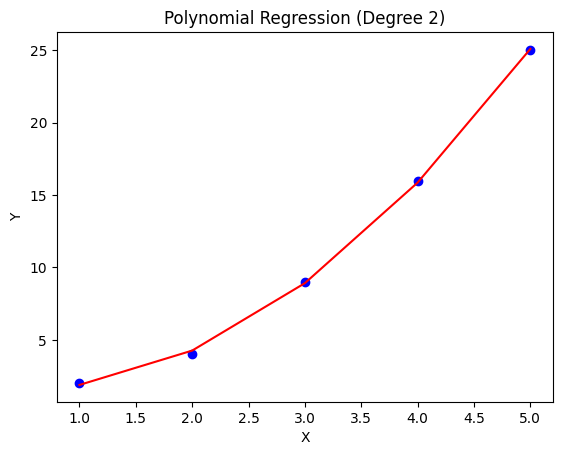

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = np.array([[1], [2], [3], [4], [5]])  # Feature (input)
y = np.array([2, 4, 9, 16, 25])  # Target (output)

poly = PolynomialFeatures(degree=2)  # Degree of the polynomial
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)

plt.scatter(x, y, color='blue')  # Original data
plt.plot(x, y_pred, color='red')  # Polynomial regression curve
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [9]:
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [10]:
x = 6 * np.random.randn(200, 1) - 3 
y = 0.8 * x**2 + 0.9 * x + 2 + np.random.randn(200, 1)  

print(x.shape)
print(y.shape)
# y=0.8x^2+0.9x+2 ::  Generating the dataset using this equation.

(200, 1)
(200, 1)


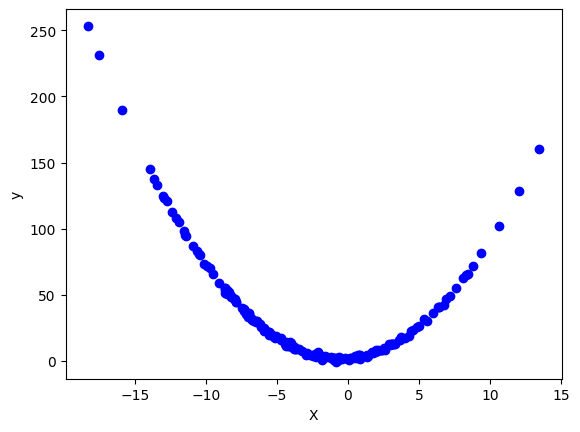

In [12]:
plt.scatter(x, y, color='b') 
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [13]:
# random_state = This ensures that the train-test split remains the same every time you run the code, which is useful for debugging and comparing model performance consistently.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [14]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = lr.predict(x_test)
r2_score(y_test, y_pred)

0.226854213454305

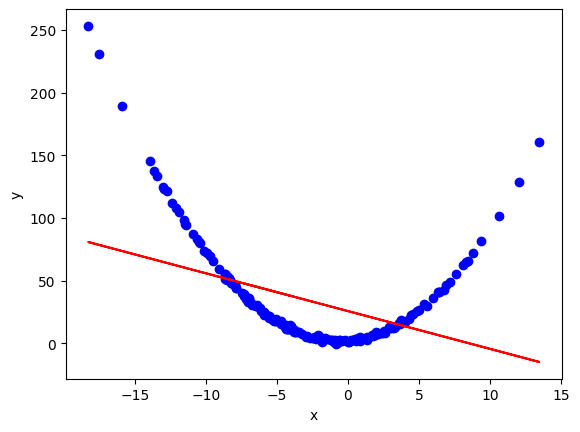

In [16]:
plt.scatter(x, y, color='b', label='Data points')  
plt.plot(x_train, lr.predict(x_train), color='r', label='Prediction')  # Predicted line
plt.xlabel('x')
plt.ylabel('y')

plt.show()

appling ploynomial Linear regression  
degree = 2

In [17]:
poly = PolynomialFeatures(degree=2)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

In [18]:
print(x_train[0])
print(x_train_trans[0])

[-7.31466483]
[ 1.         -7.31466483 53.50432154]


Polynomial features only apply on the input data, we can't apply on y means output features.

include_bias=False : we don't want 1 as a bias term, then we use the include_bias

In [19]:
lr = LinearRegression()
lr.fit(x_train_trans, y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(x_test_trans)

In [21]:
r2_score(y_test, y_pred)

0.9988069161168461

In [22]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.92730559 0.8007984 ]]
[2.00032097]


In [23]:
x_new = np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)

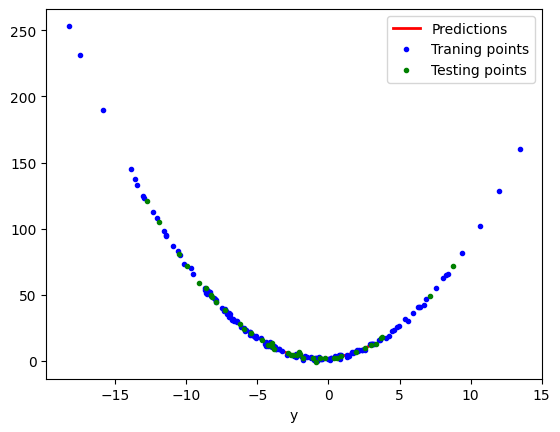

In [24]:
plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.", label="Traning points")
plt.plot(x_test, y_test, "g.", label="Testing points")
plt.xlabel("x")
plt.xlabel("y")
plt.legend()
plt.show()

In [25]:
def polynomial_regression(degree):
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)
    
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, 'r', label="Degree " + str(degree), linewidth=2)
    
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("x")
    plt.xlabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

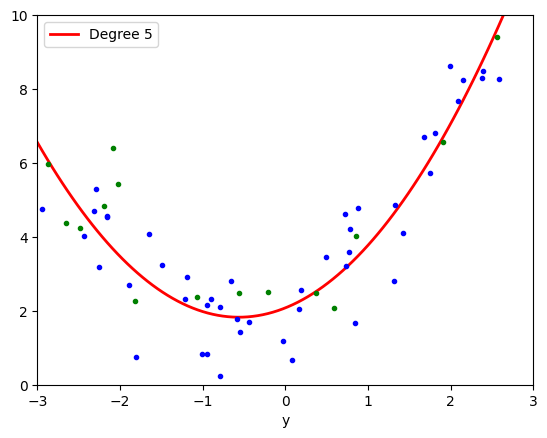

In [26]:
polynomial_regression(5)

In [30]:
# 3D Polynomial regression 
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

# Calculate z using the polynomial equation
z = x**2 + y**2 + 0.2 * y + 0.1 * x * y + 2 + np.random.randn(100, 1)

In [32]:
import plotly.express as px 
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

Multiple LInearRegression without any polynomial feature 

In [38]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(x.min(), x.max(), 10)
xGrid, yGrid = np.meshgrid(x_input, y_input)

final = np.vstack((xGrid.ravel().reshape(1,100), yGrid.ravel().reshape(1,100))).T
z_final = lr.predict(final).reshape(10,10)

In [41]:
import plotly.graph_objects as go
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final))
fig.show()

In [43]:
x_multi = np.array([x,y]).reshape(100, 2)
x_multi.shape

(100, 2)

In [45]:
poly = PolynomialFeatures(degree=2)
x_multi_trans = poly.fit_transform(x_multi)

gpt write a code using the lambda function, and more, functions using 

i have skills : 
---------------------

python 
python DSA 
numpy 
pandas 
matplotlib 
seaborn 
plotly  - learn 
Flask   -  project

SQL - project 
DA - projects 
excel - 
power - BI 

JAVA 
HTML 
CSS
JS 

---------------------
Engineering 
communication 
Leadership 
computer science 
-
check a specific need an then modify the resume and apply... 
-
international

